시험성적, 공부시간(X) > 통과(0),실패(1)

In [188]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

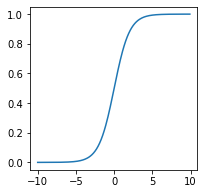

In [217]:
x = np.arange(-10,10, 0.1)
y = 1 / (1+ np.exp(-x))
plt.figure(figsize=(3,3)) #(w,h) 인치
plt.plot(x, y)

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


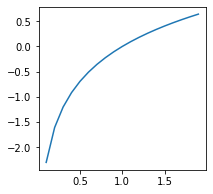

In [222]:
x = np.arange(-1,2,0.1)
y = np.log(x)
plt.figure(figsize=(3,3))
plt.plot(x, y)

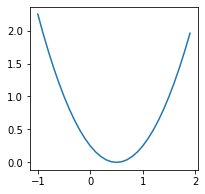

In [281]:
x = np.arange(-1,2,0.1)
y = np.square(x - 0.5)
plt.figure(figsize=(3,3))
plt.plot(x, y)

In [225]:
y = [1, 1, 1]
h = np.array([0.0001, 0.4, 1])
cost_mse = np.square(h - y)
cost_log = -np.log(h)
cost_mse, cost_log

(array([1.  , 0.36, 0.  ]), array([ 9.21,  0.92, -0.  ]))

In [227]:
y = [0, 0, 0]
h = np.array([0.0001, 0.4, 0.99])
cost_mse = np.square(h - y)
cost_log = -np.log(1 - h)
cost_mse, cost_log

(array([1.0e-08, 1.6e-01, 9.8e-01]), array([1.00e-04, 5.11e-01, 4.61e+00]))

In [282]:
from sklearn.datasets import load_breast_cancer

In [284]:
data = load_breast_cancer()

In [293]:
type([1,2,3]), type((1,2,3)), type({'name':'park', 'num':1} )

(list, tuple, dict)

In [301]:
a = {'name':'park', 'num':1}
a['city'] = 'seoul'
a['num'], a['name']
a['name']='kim'
del a['name']
a

{'num': 1, 'city': 'seoul'}

In [310]:
# 딕셔너리의 값에 접근하려면 딕['키'], 딕.키 
data.data.shape, data.target.shape

((569, 30), (569,))

In [312]:
np.mean(data.target) #양성 62% 존재

0.6274165202108963

In [313]:
data.target_names #악성, 양성

array(['malignant', 'benign'], dtype='<U9')

In [314]:
data.feature_names #30 개 특성 이름

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [323]:
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


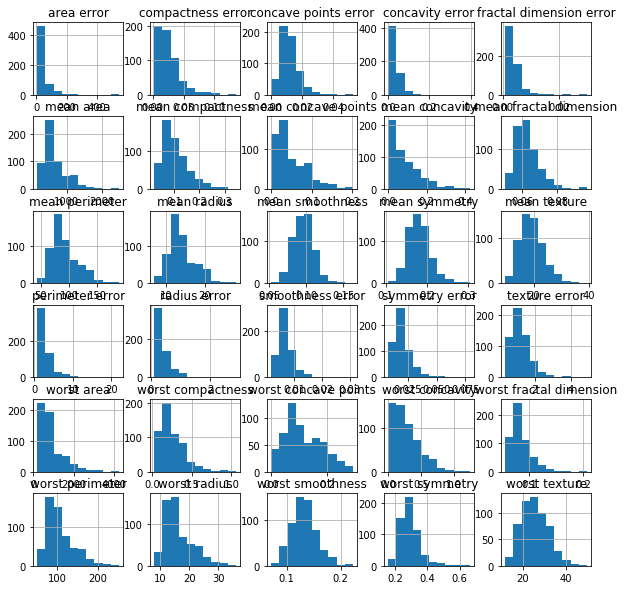

In [322]:
h = df.hist(figsize=(10,10))

In [442]:
x = data.data
y = data.target
x.shape, y.shape

((569, 30), (569,))

In [537]:
#x_norm = x / np.max(x, axis=0)
x_norm = (x - np.min(x, axis=0)) / (np.max(x, axis=0) - np.min(x, axis=0)) #min-max
np.min(x_norm), np.max(x_norm)

(0.0, 1.0)

In [538]:
#학습용 75%, 검증용 25% 분리 
y = np.expand_dims(y, axis=1) # 2차원으로 변환
m_train = int(len(y) * 0.75)
x_train = x_norm[:m_train]
x_test  = x_norm[m_train:]
y_train = y[:m_train]
y_test = y[m_train:]

In [482]:
x_train.shape, y_train.shape

((426, 30), (426, 1))

In [509]:
x_train = x_train.astype(np.float32)

In [569]:
np.mean(np.array([1,0,0]))

0.3333333333333333

In [574]:
a = tf.reduce_mean(tf.cast(np.array([1,0,0]),tf.float32))
sess.run(a)

0.33333334

In [589]:
def add(a,b):
    return a+b
add(1,3)

4

In [596]:
def feed(input_data):
    w = tf.Variable(tf.random_normal([30,1]))
    b = tf.Variable(0.0)
    z = tf.matmul(input_data, w) + b 
    h = tf.sigmoid(z)
    h = tf.clip_by_value(h, 1e-8, 1.0 - 1e-8) #log(0)이 되지않도록 최대 최소값을 지정해줍니다
    return h, w

def get_accuracy(ground_truth, p):    
    predict = tf.cast(p > 0.5, tf.int32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, tf.cast(ground_truth,tf.int32)),
                                  tf.float32))
    return accuracy

h_train, w = feed(x_train)
h_test, w = feed(x_test)
#            제약항  +   분류 오차항
cost_cls = tf.reduce_mean(y_train * -tf.log(h_train) + 
                          (1-y_train) * -tf.log(1 - h_train)) #CE : Cross Entropy 
cost = 0.001 * tf.reduce_mean(tf.square(w)) + cost_cls
accuracy_train = get_accuracy(y_train, h_train)
accuracy_test = get_accuracy(y_test, h_test)

In [597]:
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [600]:
for i in range(10000):
    _, acc, co = sess.run([train, accuracy_train, cost])
    if i%1000==0:         
        print(i, co, acc, sess.run(accuracy_test))

0 0.69792676 0.55911523 0.6124505
1000 0.69666076 0.559512 0.6124505
2000 0.69552976 0.561099 0.6124505
3000 0.6945165 0.5614957 0.6124505
4000 0.69360644 0.5618925 0.6124505
5000 0.6927872 0.5634795 0.6124505
6000 0.692047 0.5646697 0.6124505
7000 0.6913765 0.56506646 0.6124505
8000 0.69076777 0.56665343 0.6124505
9000 0.69021326 0.56744695 0.6124505


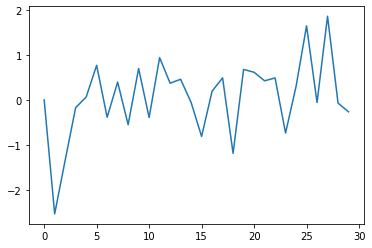

In [599]:
plt.plot(sess.run(w))